<a href="https://colab.research.google.com/github/cygkichi/dl4us_test/blob/master/1D_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, Conv1D
from keras.optimizers import SGD
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
# LRP パッケージ
!git clone https://github.com/albermax/innvestigate.git
import os
os.chdir('innvestigate')
!python setup.py test

fatal: destination path 'innvestigate' already exists and is not an empty directory.
running pytest
Searching for pytest
Best match: pytest 4.0.0
Processing pytest-4.0.0-py3.6.egg

Using /content/innvestigate/.eggs/pytest-4.0.0-py3.6.egg
Searching for keras==2.2.2
Best match: Keras 2.2.2
Processing Keras-2.2.2-py3.6.egg

Using /content/innvestigate/.eggs/Keras-2.2.2-py3.6.egg
Searching for keras-preprocessing==1.0.2
Best match: Keras-Preprocessing 1.0.2
Processing Keras_Preprocessing-1.0.2-py3.6.egg

Using /content/innvestigate/.eggs/Keras_Preprocessing-1.0.2-py3.6.egg
Searching for keras-applications==1.0.4
Best match: Keras-Applications 1.0.4
Processing Keras_Applications-1.0.4-py3.6.egg

Using /content/innvestigate/.eggs/Keras_Applications-1.0.4-py3.6.egg
running egg_info
writing innvestigate.egg-info/PKG-INFO
writing dependency_links to innvestigate.egg-info/dependency_links.txt
writing requirements to innvestigate.egg-info/requires.txt
writing top-level names to innvestigate.egg-i

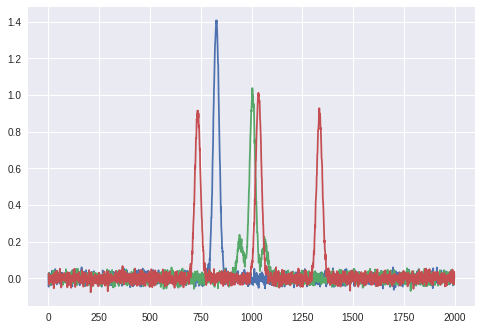

In [3]:
# Generate Data
def xs_data(label=0):
    def func(N=2000, m=50, s1=1, s2=1, d=10, da=0.2, ra=0.02):
        xs = np.linspace(0,100,N)
        ys = np.zeros(N)
        ys += np.exp(-((xs-m  )/s1)**2)
        ys += np.exp(-((xs-m-d)/s2)**2) * da
        ys += np.exp(-((xs-m+d)/s2)**2) * da
        ys += np.random.randn(N) * ra
        return ys

    m = 40 + 20*np.random.rand()
    if label == 0:
        return func(m=m, d=0)
    elif label == 1:
        return func(m=m, d=3,  da=0.2)
    elif label == 2:
        return func(m=m, d=15, da=0.9)

plt.plot(xs_data(label = 0))
plt.plot(xs_data(label = 1))
plt.plot(xs_data(label = 2))
plt.show()

In [0]:
num_samples = 1000
num_labels  = 3

y = np.random.randint(0,num_labels, num_samples)
X = np.array([xs_data(label=l) for l in y])

X = X.reshape(num_samples, 2000, 1)
y = np.eye(num_labels)[y]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)


In [0]:
model = Sequential()
#model.add(Conv1D(filters=2000, kernel_size=200))
#model.add(Activation('relu'))
model.add(Dense(2000, activation='relu'))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(800, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(loss='mse',optimizer='sgd',metrics=['accuracy'])

model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), batch_size=50)

Train on 670 samples, validate on 330 samples
Epoch 1/200


100/100 [==============================] - 0s 440us/step
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]


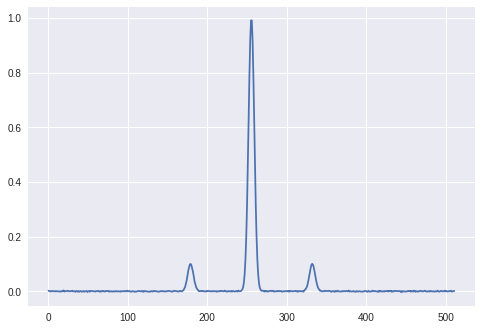

In [58]:
model.evaluate(x_valid, y_valid, batch_size=128)
model.predict(x_valid[:10], batch_size=None, verbose=0, steps=None)
print(y_valid[:10])
plt.plot(x_valid[8].T.reshape(512))
plt.show()

In [0]:
import innvestigate

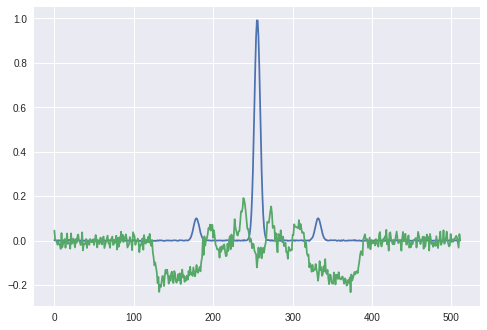

In [57]:
n = 8
model_wo_sm = innvestigate.utils.keras.graph.model_wo_softmax(model)
gradient_analyzer = innvestigate.analyzer.Gradient(model_wo_sm)
analysis = gradient_analyzer.analyze(x_valid[n:n+1])

plt.plot(x_valid[n:n+1].flatten())
plt.plot(analysis.flatten())
#plot.imshow(analysis.squeeze(), cmap='seismic', interpolation='nearest')
plt.show()

In [0]:
analysis.shape


(1, 512, 1)

In [0]:
}